# Predicting Heart Disease: Analysis of Risk Factors with Machine Learning

Welcome to this comprehensive exploratory data analysis (EDA) and predictive modeling project focused on heart disease. In this notebook, we delve deep into understanding the factors influencing heart disease through both univariate and bivariate analysis, unveiling the relationships between various health indicators. Additionally, we aim to build and compare predictive models using three different algorithms: Logistic Regression, RandomForestRegressor, and SVM, to identify which model most accurately predicts the occurrence of heart attacks. This analysis not only sheds light on the underlying patterns and correlations within the dataset but also provides a robust foundation for developing effective preventive measures against heart disease.

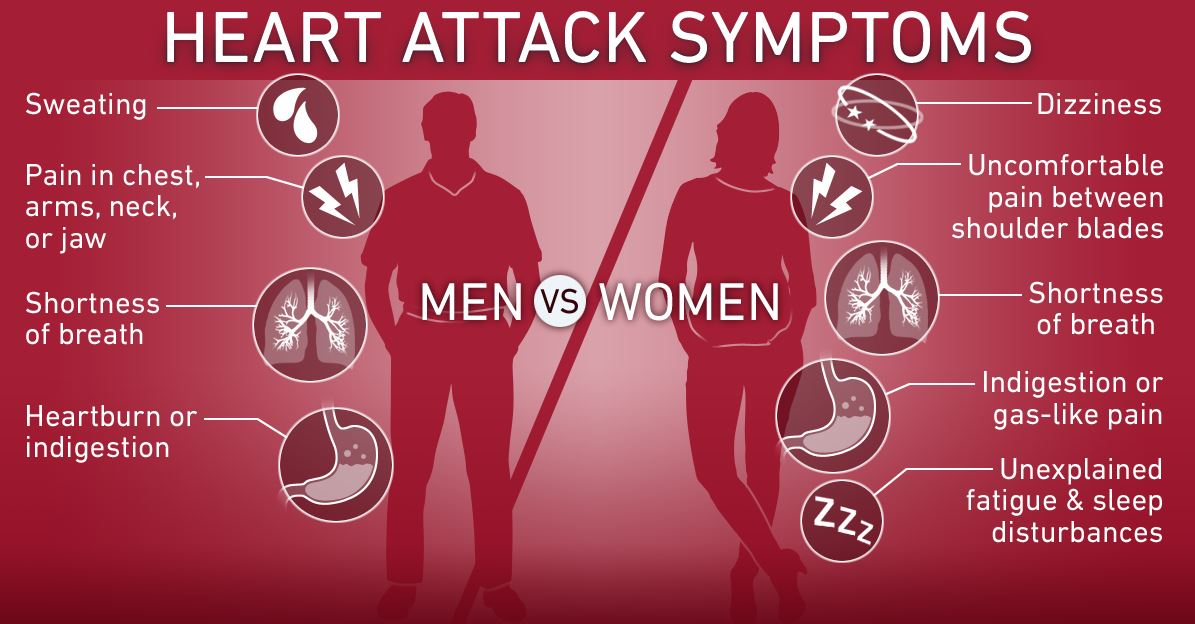

## Analysis Content
1. [Unveiling Questions for Detailed Analysis](#22)
1. [Python Libraries](#1)
1. [General Dataset Description](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Label Encoding for Column with Yes and No](#5)
1. [Visualization Function](#6)
1. [Univariate Analysis & Visualizations](#7)
    1. [Categorical Feature Analysis](#7.1)
    1. [Numeric Feature Analysis](#7.2)
1. [Bivariate Analysis](#8)
1. [EDA Conclusion](#9)
1. [Expanded Insights and Implications](#10)
1. [Modelling](#11)
    1. [Encoding Categorical Columns](#11.1)
    1. [Train/Test Split](#11.2)
    1. [Training](#11.3)
        1. [LogisticRegression](#11.3.1)
        1. [RandomForestClassifier](#11.3.2)
        1. [SVM](#11.3.3)
    1. [Comparison between Models result](#11.4)

<a id="22"></a>
## Unveiling Questions for Detailed Analysis

1. **Smoking and Heart Disease**
   - Is there a relationship between smoking and the prevalence of heart disease?

2. **Alcohol Consumption and Heart Disease**
   - Does excessive alcohol drinking correlate with a higher prevalence of heart disease?

3. **Stroke and Heart Disease**
   - How often does heart disease occur in individuals who have experienced a stroke?

4. **Physical Health and Heart Disease**
   - How does the average number of days of poor physical health differ between individuals with and without heart disease?

5. **BMI and Smoking**
   - Is there a significant difference in BMI between smokers and non-smokers?

6. **BMI and Gender Differences**
   - How does BMI differ between males and females?

7. **Physical Activity and BMI**
   - Is there a relationship between physical activity and BMI?

8. **Lifestyle Factors: Smoking and Alcohol Consumption**
   - How often do smokers also drink excessively?

9. **Physical and Mental Health Correlation**
   - Is there a correlation between the number of days of poor physical health and poor mental health?

10. **General Health Across Age Categories**
    - How does self-reported general health vary across different age categories?

11. **Diabetes and Gender**
    - Is there a difference in the prevalence of diabetes between males and females?

12. **Stroke Incidence in Diabetics**
    - How often does stroke occur in individuals with diabetes?

13. **General Health and Physical Activity**
    - How does self-reported general health vary between individuals who engage in physical activity and those who don't?

14. **Asthma and Kidney Disease**
    - Is there a relationship between asthma and kidney disease?

15. **Sleep Duration and Ethnicity**
    - How does the average number of hours of sleep vary across different racial or ethnic groups?

This notebook is structured to systematically address these questions, offering a clear view of how lifestyle, physiological, and demographic factors interplay with heart disease risk. Through this analysis, we aim to provide actionable insights and inform future healthcare strategies.

<a id="1"></a>
## Importing The Necessary libraries

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations and linear algebra
import pandas as pd  # For data manipulation and analysis, particularly with CSV files

import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations in Python
import seaborn as sns  # For high-level interface for drawing attractive statistical graphics

# Sklearn libraries for data preprocessing and model building
from sklearn.preprocessing import LabelEncoder  # For encoding labels with value between 0 and n_classes-1
from sklearn.linear_model import LogisticRegression  # Logistic regression model for binary classification tasks
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data into train and test sets and optimizing parameters
from sklearn.metrics import accuracy_score, roc_curve  # For evaluating model performance through accuracy and ROC curve metrics
from sklearn.ensemble import RandomForestClassifier  # For building a classifier using Random Forests
from sklearn.svm import SVC  # For implementing Support Vector Machine classification

# Configuration to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

# Setting aesthetic parameters in seaborn
sns.set_style('darkgrid')  # Set the background theme of the plots to dark grid
sns.set_palette("deep")  # Set the color palette of the plots to deep

<a id="2"></a>
## General Dataset Description

This dataset contains anonymized health survey data from adults in the United States. The primary objective is to predict heart disease occurrence based on various risk factors and demographic information. The dataset includes the following features:

1. **Demographic Information**
   - **Sex**: Gender of the individual (Male/Female)
   - **AgeCategory**: Age group of the individual (e.g., 18-24, 80 or older)
   - **Race**: Race or ethnicity of the individual (e.g., White, Black, Hispanic)

2. **Lifestyle Factors**
   - **Smoking**: Whether the individual has smoked at least 100 cigarettes in their lifetime
   - **AlcoholDrinking**: Whether the individual drinks heavily (defined as more than 14 drinks per week for men and more than 7 drinks per week for women)
   - **PhysicalActivity**: Whether the individual engages in physical activity or exercise outside of their regular job
   - **SleepTime**: Average number of hours of sleep per day

3. **Health Conditions and Diseases**
   - **HeartDisease**: Whether the individual has been diagnosed with heart disease
   - **BMI**: Body Mass Index of the individual
   - **Stroke**: Whether the individual has had a stroke
   - **PhysicalHealth**: Number of days in the past month when physical health was poor
   - **MentalHealth**: Number of days in the past month when mental health was poor
   - **DiffWalking**: Whether the individual has difficulty walking or climbing stairs
   - **Asthma**: Whether the individual has asthma
   - **KidneyDisease**: Whether the individual has kidney disease
   - **SkinCancer**: Whether the individual has been diagnosed with skin cancer
   - **Diabetic**: Whether the individual has diabetes or pre-diabetes

4. **General Health Status**
   - **GenHealth**: Self-reported general health status (Excellent, Very good, Good, Fair, Poor)

---

This dataset can be used to explore correlations between lifestyle factors and various health conditions, especially heart disease. Researchers can identify key risk factors and develop predictive models to improve early detection and preventive measures.

<a id="3"></a>
## Read and Analyse Data

In [2]:
# Read a CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/heart-attack-data/heart_2020_cleaned.csv')

In [3]:
# Display the first few rows of the DataFrame
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# Display the last few rows of the DataFrame
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [5]:
# Get the dimensions of the DataFrame
df.shape

(319795, 18)

In [6]:
# Get the column names of the DataFrame
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
# Display concise summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
# Generate descriptive statistics of the DataFrame
# Transpose the result for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


<a id="4"></a>
## Missing Value Analysis

In [9]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<a id="5"></a>
## Label Encoding for Column with Yes and No

#### Before Label Encoding

In [10]:
# Iterate over each column in the dataframe
for i in list(df.columns):
    # Count the number of unique values in the current column
    unique_val_count = df[i].value_counts().shape[0]
    # Check if the column has exactly 2 unique values
    if unique_val_count > 1 and unique_val_count < 3:
        # Print the column name and the count of unique values
        print("{} -- {}".format(i, unique_val_count))

HeartDisease -- 2
Smoking -- 2
AlcoholDrinking -- 2
Stroke -- 2
DiffWalking -- 2
Sex -- 2
PhysicalActivity -- 2
Asthma -- 2
KidneyDisease -- 2
SkinCancer -- 2


In [11]:
# List of columns with two unique values to be encoded
two_unique_val = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Print unique values in each column before label encoding
print('Unique Values Before Label Encoding\n')
for cat_col in two_unique_val:
    # Print the column name and its unique values
    print(cat_col, ' : ', pd.unique(df[cat_col]), '\n')

Unique Values Before Label Encoding

HeartDisease  :  ['No' 'Yes'] 

Smoking  :  ['Yes' 'No'] 

AlcoholDrinking  :  ['No' 'Yes'] 

Stroke  :  ['No' 'Yes'] 

Stroke  :  ['No' 'Yes'] 

DiffWalking  :  ['No' 'Yes'] 

Sex  :  ['Female' 'Male'] 

PhysicalActivity  :  ['Yes' 'No'] 

Asthma  :  ['Yes' 'No'] 

KidneyDisease  :  ['No' 'Yes'] 

SkinCancer  :  ['Yes' 'No'] 



In [12]:
# Initialize and apply LabelEncoder to each specified column in the dataframe
HeartDisease = LabelEncoder()
df['HeartDisease'] = HeartDisease.fit_transform(df['HeartDisease'])

Smoking = LabelEncoder()
df['Smoking'] = Smoking.fit_transform(df['Smoking'])

AlcoholDrinking = LabelEncoder()
df['AlcoholDrinking'] = AlcoholDrinking.fit_transform(df['AlcoholDrinking'])

Stroke = LabelEncoder()
df['Stroke'] = Stroke.fit_transform(df['Stroke'])

DiffWalking = LabelEncoder()
df['DiffWalking'] = DiffWalking.fit_transform(df['DiffWalking'])

Sex = LabelEncoder()
df['Sex'] = Sex.fit_transform(df['Sex'])

PhysicalActivity = LabelEncoder()
df['PhysicalActivity'] = PhysicalActivity.fit_transform(df['PhysicalActivity'])

Asthma = LabelEncoder()
df['Asthma'] = Asthma.fit_transform(df['Asthma'])

KidneyDisease = LabelEncoder()
df['KidneyDisease'] = KidneyDisease.fit_transform(df['KidneyDisease'])

SkinCancer = LabelEncoder()
df['SkinCancer'] = SkinCancer.fit_transform(df['SkinCancer'])

#### After Label Encoding

In [13]:
# Print unique values in each column after label encoding
print('Unique Values After Label Encoding\n')
for cat_col in two_unique_val:
    # Print the column name and its unique values post-encoding
    print(cat_col, ' : ', pd.unique(df[cat_col]), '\n')

Unique Values After Label Encoding

HeartDisease  :  [0 1] 

Smoking  :  [1 0] 

AlcoholDrinking  :  [0 1] 

Stroke  :  [0 1] 

Stroke  :  [0 1] 

DiffWalking  :  [0 1] 

Sex  :  [0 1] 

PhysicalActivity  :  [1 0] 

Asthma  :  [1 0] 

KidneyDisease  :  [0 1] 

SkinCancer  :  [1 0] 



In [14]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0


<a id="6"></a>
## Visualization Function

In [15]:
# Function to show bar graphs for binary or categorical columns
def plot_bar(column, title, order_va=None):
    # Create a new figure with specified size
    plt.figure(figsize=(12, 5))
    # Create a count plot with the specified column and palette
    ax = sns.countplot(data=df, x=column, palette='coolwarm', order=order_va)
    # Annotate each bar with the height value
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()))
    # Set the title of the plot
    plt.title(title)
    # Display the plot
    plt.show()

# Function to show histograms for numerical columns
def plot_hist(column, title, bins=20):
    # Create a new figure with specified size
    plt.figure(figsize=(8, 6))
    # Create a histogram with kernel density estimate
    sns.histplot(df[column], bins=bins, kde=True, color='blue')
    # Set the title of the plot
    plt.title(title)
    # Display the plot
    plt.show()

# Function to show pie charts for categorical columns
def plot_pie(column, title):
    # Create a new figure with specified size
    plt.figure(figsize=(8, 6))
    # Create a pie chart with value counts of the column
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(df[column].unique())))
    # Set the title of the plot
    plt.title(title)
    # Remove the y-axis label for a cleaner look
    plt.ylabel('')
    # Display the plot
    plt.show()

# Function to show count plots for categorical columns with a hue
def plot_count(x, hue, title, order_va=None):
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))
    # Create a count plot with hue differentiation
    ax = sns.countplot(data=df, x=x, hue=hue, palette='coolwarm', order=order_va)
    # Annotate each bar with the height value
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()))
    # Set the title of the plot
    plt.title(title)
    # Display the plot
    plt.show()

# Function to show box plots for numerical vs. categorical columns
def plot_box(x, y, title):
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))
    # Create a box plot to show distribution
    sns.boxplot(data=df, x=x, y=y, palette='coolwarm')
    # Set the title of the plot
    plt.title(title)
    # Display the plot
    plt.show()

# Function to show violin plots for numerical vs. categorical columns
def plot_violin(x, y, title):
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))
    # Create a violin plot to show distribution
    sns.violinplot(data=df, x=x, y=y, palette='coolwarm')
    # Set the title of the plot
    plt.title(title)
    # Display the plot
    plt.show()

# Function to show scatter plots for numerical vs. numerical columns
def plot_scatter(x, y, title):
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))
    # Create a scatter plot with hue differentiation and point size
    sns.scatterplot(data=df, x=x, y=y, hue='HeartDisease', palette='coolwarm', s=60)
    # Set the title of the plot
    plt.title(title)
    # Display the plot
    plt.show()

<a id="7"></a>
## Univariate Analysis & Visualizations

<a id="7.1"></a>
## Categorical Feature Analysis

In [16]:
# List of categorical columns to be analyzed
categorical_list = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']

## 1) AgeCategory Column

   - How is the age distribution across the different age categories?


Age Category Analysis:


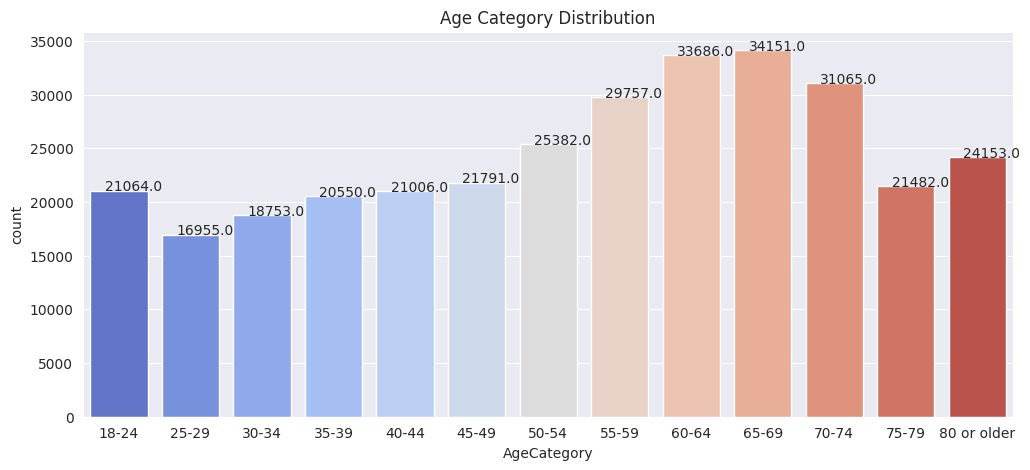

In [17]:
# Define the order of AgeCategory for plotting
order_AgeCategory = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
                     '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# Print statement to indicate the beginning of Age Category analysis
print("\nAge Category Analysis:")

# Plot bar graph for 'AgeCategory' column with the title "Age Category Distribution" and the specified order
plot_bar('AgeCategory', "Age Category Distribution", order_AgeCategory)

- **Answer**: The largest age group is **65-69** (11.4%), followed by **60-64** (11.2%) and **70-74** (10.3%). The smallest age group is **25-29** (5.7%).

## 2) Race Column

- What is the most common race or ethnicity in the dataset?


Race Analysis:


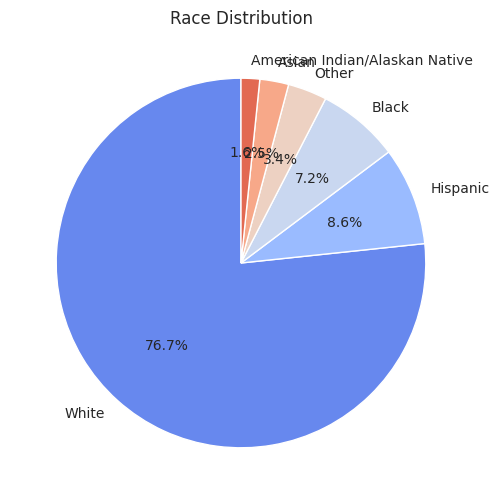

In [18]:
# Print statement to indicate the beginning of Race analysis
print("\nRace Analysis:")
# Plot pie chart for 'Race' column with the title "Race Distribution"
plot_pie('Race', "Race Distribution")

- **Answer**: The most common race in the dataset is **White** (77.1%), followed by **Hispanic** (8.6%) and **Black** (7.2%).

## 3) Diabetic Column

   - What proportion of individuals have diabetes?


Diabetic Analysis:


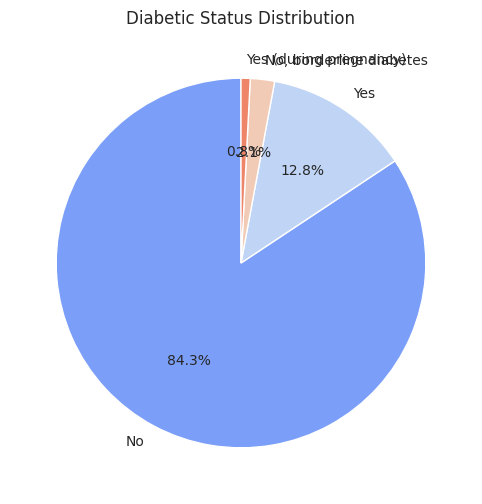

In [19]:
# Print statement to indicate the beginning of Diabetic analysis
print("\nDiabetic Analysis:")
# Plot pie chart for 'Diabetic' column with the title "Diabetic Status Distribution"
plot_pie('Diabetic', "Diabetic Status Distribution")

- **Answer**: **13.7%** of individuals in the dataset have diabetes.

## 4) GenHealth Column

   - What is the most common self-reported general health status in the dataset?


General Health Analysis:


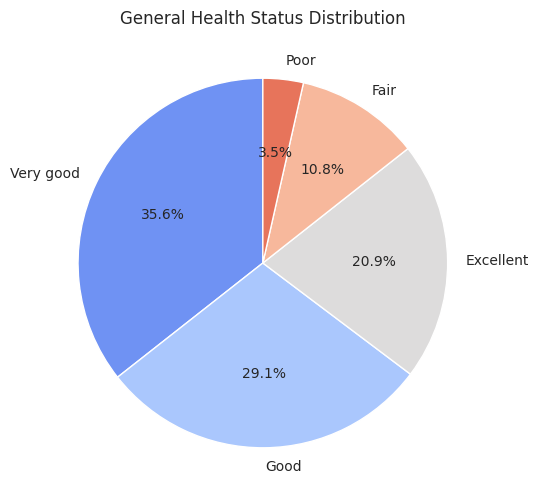

In [20]:
# Print statement to indicate the beginning of General Health analysis
print("\nGeneral Health Analysis:")
# Plot pie chart for 'GenHealth' column with the title "General Health Status Distribution"
plot_pie('GenHealth', "General Health Status Distribution")

- **Answer**: The most common self-reported general health status is "Very good" (35.8%), followed by "Good" (29.3%) and "Excellent" (21.0%).

<a id="7.2"></a>
## Numeric Feature Analysis

In [21]:
# List of numerical columns to be analyzed
numeric_list = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
                'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'PhysicalActivity', 'SleepTime',
                'Asthma', 'KidneyDisease', 'SkinCancer']

## 1) HeartDisease Column

- What proportion of the surveyed individuals have heart disease?

HeartDisease Analysis:


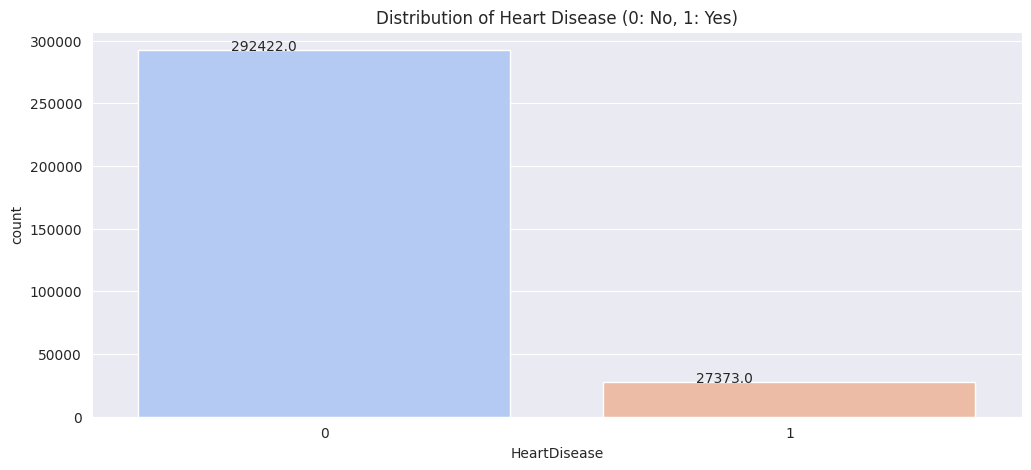

In [22]:
# Print statement to indicate the beginning of Heart Disease analysis
print("HeartDisease Analysis:")

# Plot bar graph for 'HeartDisease' column with the title "Distribution of Heart Disease (0: No, 1: Yes)"
plot_bar('HeartDisease', "Distribution of Heart Disease (0: No, 1: Yes)")

- **Answer**: **8.6%** of individuals in the dataset have heart disease.

## 2) BMI Column

   - What is the average BMI of individuals in this dataset?
   - How is BMI distributed across the surveyed individuals?


BMI Analysis:

Average BMI: 28.33


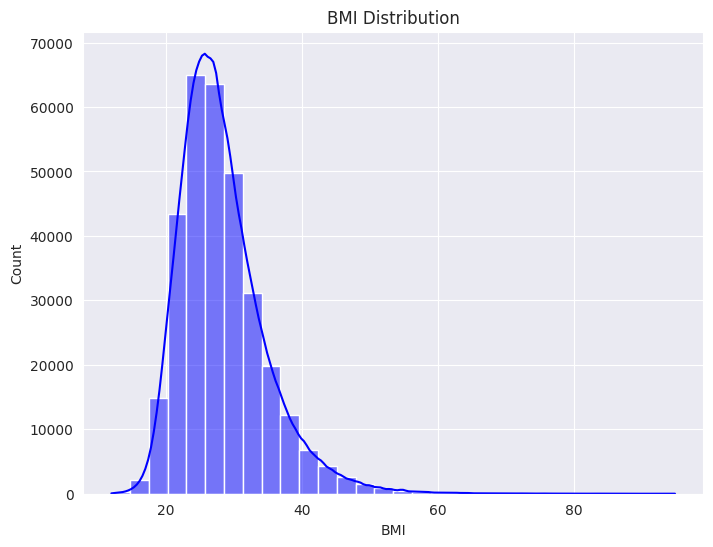

In [23]:
# Print statement to indicate the beginning of BMI analysis
print("\nBMI Analysis:")
# Calculate and print the average BMI
print(f"\nAverage BMI: {df['BMI'].mean():.2f}")
# Plot histogram for 'BMI' column with the title "BMI Distribution" and 30 bins
plot_hist('BMI', "BMI Distribution", bins=30)

- **Answer**: The average BMI of individuals in this dataset is **28.3**.
- **Answer**: The distribution of BMI is right-skewed, with the majority of individuals having a BMI between **20** and **35**.

## 3) Smoking Column

   - What proportion of the individuals are smokers?


Smoking Analysis:

Proportion of individuals who smoke: 41.25%


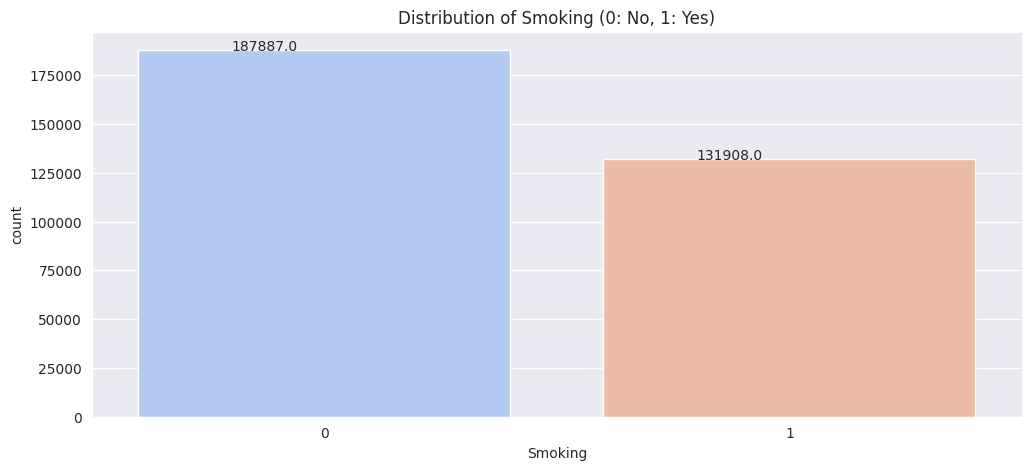

In [24]:
# Print statement to indicate the beginning of Smoking analysis
print("\nSmoking Analysis:")
# Calculate and print the proportion of individuals who smoke
print(f"\nProportion of individuals who smoke: {df['Smoking'].mean() * 100:.2f}%")
# Plot bar graph for 'Smoking' column with the title "Distribution of Smoking (0: No, 1: Yes)"
plot_bar('Smoking', "Distribution of Smoking (0: No, 1: Yes)")

- **Answer**: **41.2%** of individuals in the dataset are smokers.

## 4) AlcoholDrinking Column

   - What proportion of individuals consume alcohol excessively?


Alcohol Drinking Analysis:

Proportion of individuals who drink excessively: 6.81%


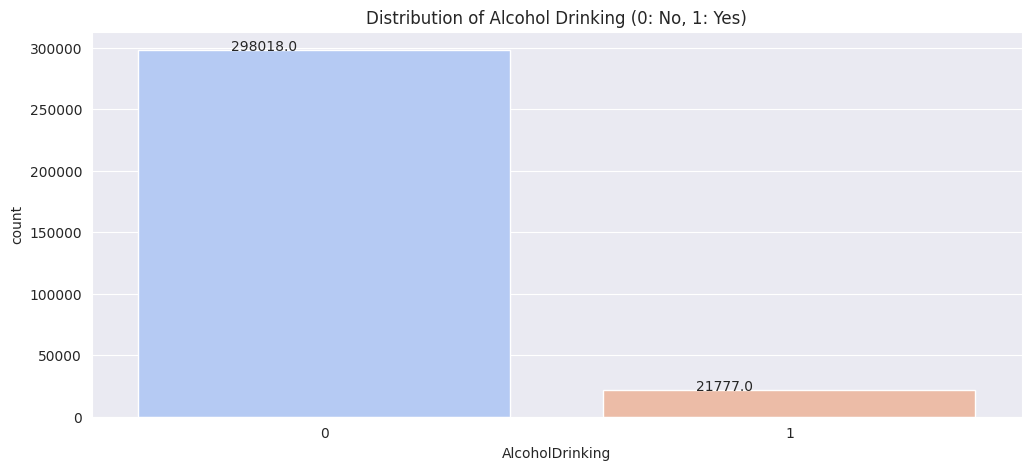

In [25]:
# Print statement to indicate the beginning of Alcohol Drinking analysis
print("\nAlcohol Drinking Analysis:")
# Calculate and print the proportion of individuals who drink excessively
print(f"\nProportion of individuals who drink excessively: {df['AlcoholDrinking'].mean() * 100:.2f}%")
# Plot bar graph for 'AlcoholDrinking' column with the title "Distribution of Alcohol Drinking (0: No, 1: Yes)"
plot_bar('AlcoholDrinking', "Distribution of Alcohol Drinking (0: No, 1: Yes)")

- **Answer**: **6.8%** of individuals consume alcohol excessively.

## 5) Stroke Column

   - What proportion of the individuals have experienced a stroke?


Stroke Analysis:

Proportion of individuals who have had a stroke: 3.77%


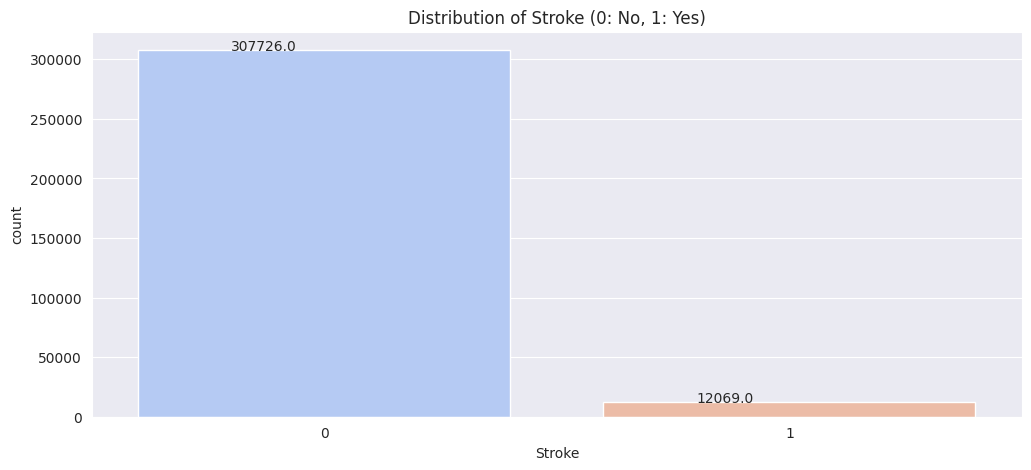

In [26]:
# Print statement to indicate the beginning of Stroke analysis
print("\nStroke Analysis:")
# Calculate and print the proportion of individuals who have had a stroke
print(f"\nProportion of individuals who have had a stroke: {df['Stroke'].mean() * 100:.2f}%")
# Plot bar graph for 'Stroke' column with the title "Distribution of Stroke (0: No, 1: Yes)"
plot_bar('Stroke', "Distribution of Stroke (0: No, 1: Yes)")

- **Answer**: **3.8%** of individuals in the dataset have experienced a stroke.

## 6) PhysicalHealth Column

   - What is the average number of days of poor physical health reported?


Physical Health Analysis:

Average days of poor physical health: 3.37


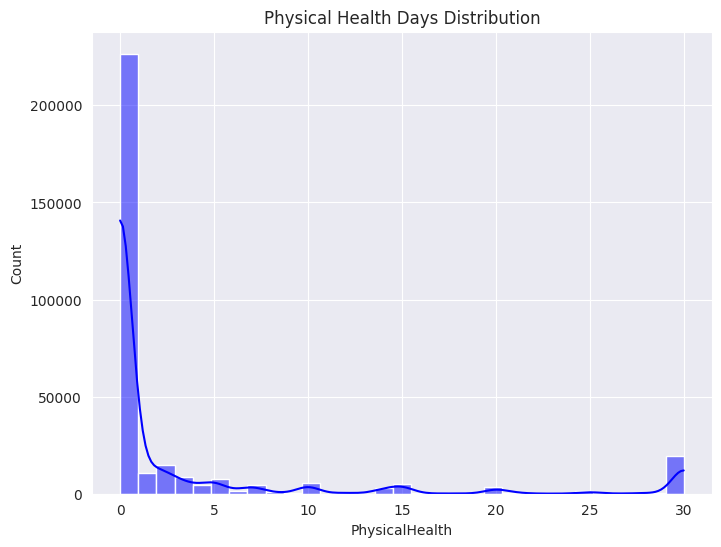

In [27]:
# Print statement to indicate the beginning of Physical Health analysis
print("\nPhysical Health Analysis:")
# Calculate and print the average days of poor physical health
print(f"\nAverage days of poor physical health: {df['PhysicalHealth'].mean():.2f}")
# Plot histogram for 'PhysicalHealth' column with the title "Physical Health Days Distribution" and 31 bins
plot_hist('PhysicalHealth', "Physical Health Days Distribution", bins=31)

- **Answer**: The average number of days of poor physical health reported is **3.4** days per month.

## 7) MentalHealth Column

   - What is the average number of days of poor mental health reported?


Mental Health Analysis:

Average days of poor mental health: 3.90


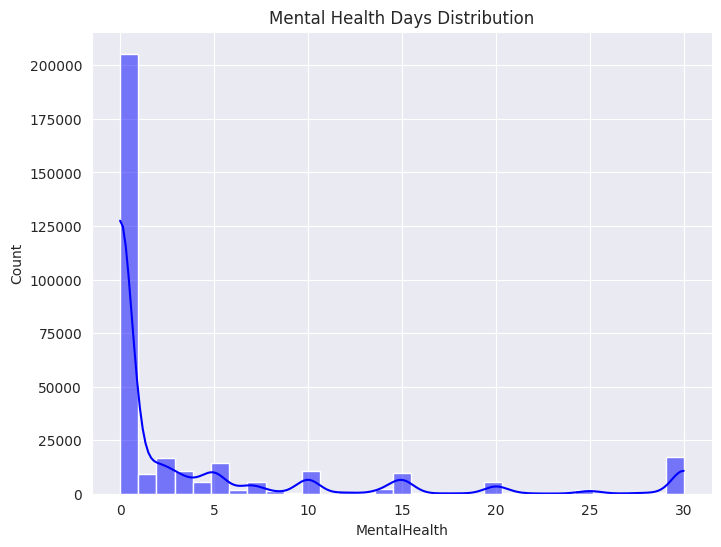

In [28]:
# Print statement to indicate the beginning of Mental Health analysis
print("\nMental Health Analysis:")
# Calculate and print the average days of poor mental health
print(f"\nAverage days of poor mental health: {df['MentalHealth'].mean():.2f}")
# Plot histogram for 'MentalHealth' column with the title "Mental Health Days Distribution" and 31 bins
plot_hist('MentalHealth', "Mental Health Days Distribution", bins=31)

- **Answer**: The average number of days of poor mental health reported is **3.9** days per month.

## 8) DiffWalking Column

   - What proportion of individuals have difficulty walking or climbing stairs?


Difficulty Walking Analysis:

Proportion of individuals with difficulty walking: 13.89%


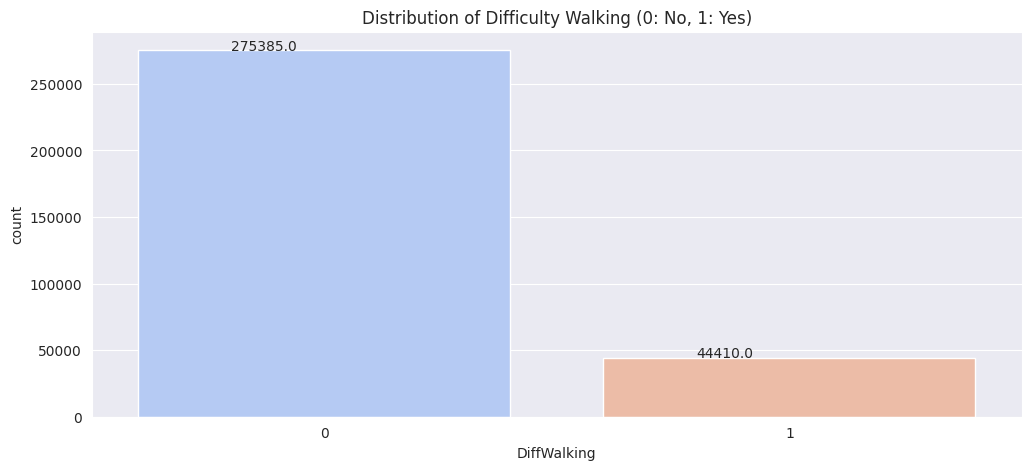

In [29]:
# Print statement to indicate the beginning of Difficulty Walking analysis
print("\nDifficulty Walking Analysis:")
# Calculate and print the proportion of individuals with difficulty walking
print(f"\nProportion of individuals with difficulty walking: {df['DiffWalking'].mean() * 100:.2f}%")
# Plot bar graph for 'DiffWalking' column with the title "Distribution of Difficulty Walking (0: No, 1: Yes)"
plot_bar('DiffWalking', "Distribution of Difficulty Walking (0: No, 1: Yes)")

- **Answer**: **13.9%** of individuals in the dataset have difficulty walking or climbing stairs.

## 9) Sex Column

   - What is the distribution of the dataset by sex (Male/Female)?

Distribution of dataset by sex:
Sex
0    0.524727
1    0.475273
Name: proportion, dtype: float64

Sex Analysis:


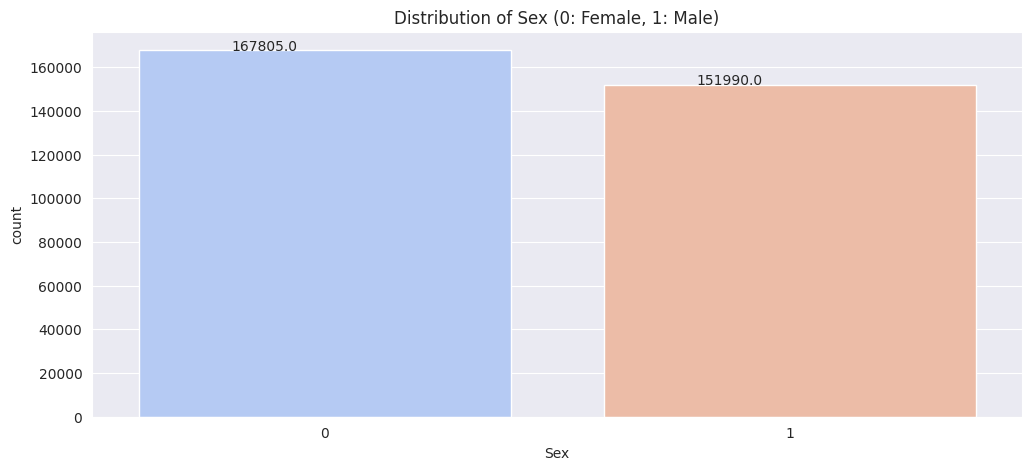

In [30]:
# Calculate and print the distribution of the dataset by sex
sex_distribution = df['Sex'].value_counts(normalize=True)
print("Distribution of dataset by sex:")
print(sex_distribution)

# Print statement to indicate the beginning of Sex analysis
print("\nSex Analysis:")
# Plot bar graph for 'Sex' column with the title "Distribution of Sex (0: Female, 1: Male)"
plot_bar('Sex', "Distribution of Sex (0: Female, 1: Male)")

- **Answer**: The dataset comprises **52.5%** females and **47.5%** males.   

## 10) PhysicalActivity Column

   - What proportion of individuals have engaged in physical activity?


Physical Activity Analysis:

Proportion of individuals with physical activity: 77.54%


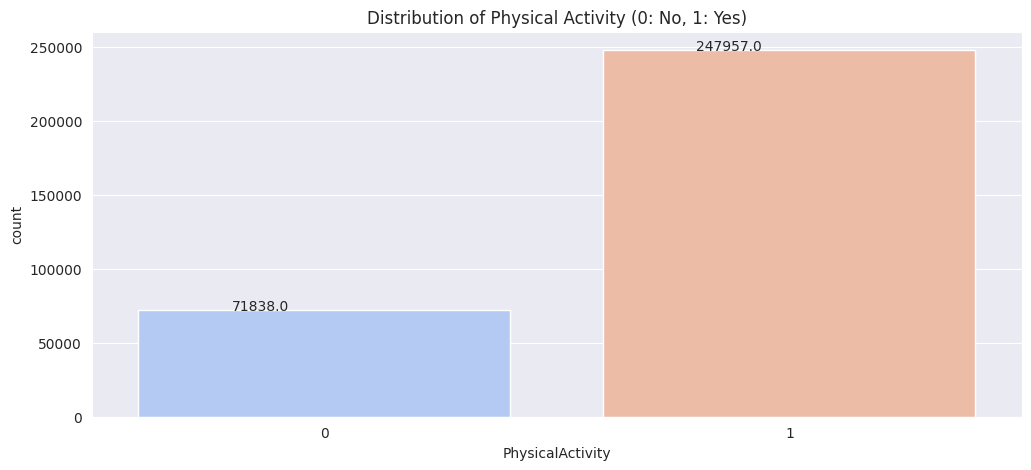

In [31]:
# Print statement to indicate the beginning of Physical Activity analysis
print("\nPhysical Activity Analysis:")
# Calculate and print the proportion of individuals with physical activity
print(f"\nProportion of individuals with physical activity: {df['PhysicalActivity'].mean() * 100:.2f}%")
# Plot bar graph for 'PhysicalActivity' column with the title "Distribution of Physical Activity (0: No, 1: Yes)"
plot_bar('PhysicalActivity', "Distribution of Physical Activity (0: No, 1: Yes)")

- **Answer**: **77.5%** of individuals have engaged in physical activity.

## 11) SleepTime

   - What is the average number of hours of sleep per day for individuals in the dataset?


Sleep Time Analysis:

Average hours of sleep per day: 7.10


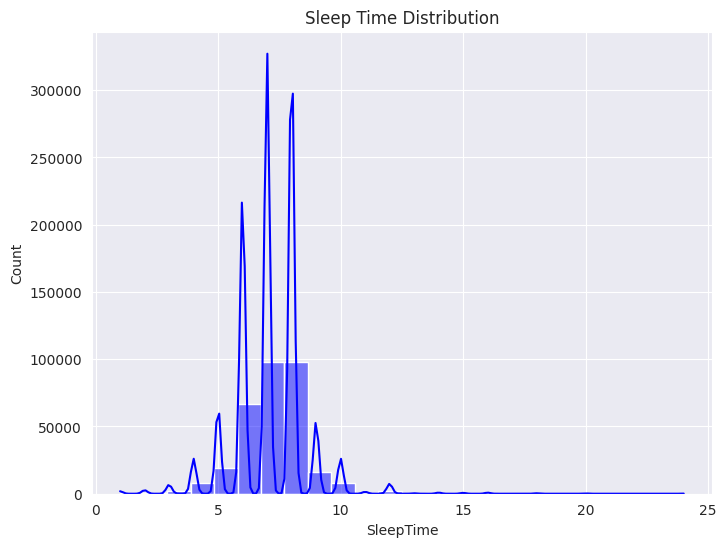

In [32]:
# Print statement to indicate the beginning of Sleep Time analysis
print("\nSleep Time Analysis:")
# Calculate and print the average hours of sleep per day
print(f"\nAverage hours of sleep per day: {df['SleepTime'].mean():.2f}")
# Plot histogram for 'SleepTime' column with the title "Sleep Time Distribution" and 24 bins
plot_hist('SleepTime', "Sleep Time Distribution", bins=24)

- **Answer**: The average number of hours of sleep per day is **7.1** hours.

## 12) Asthma Column

   - What proportion of individuals have asthma?


Asthma Analysis:

Proportion of individuals with asthma: 13.41%


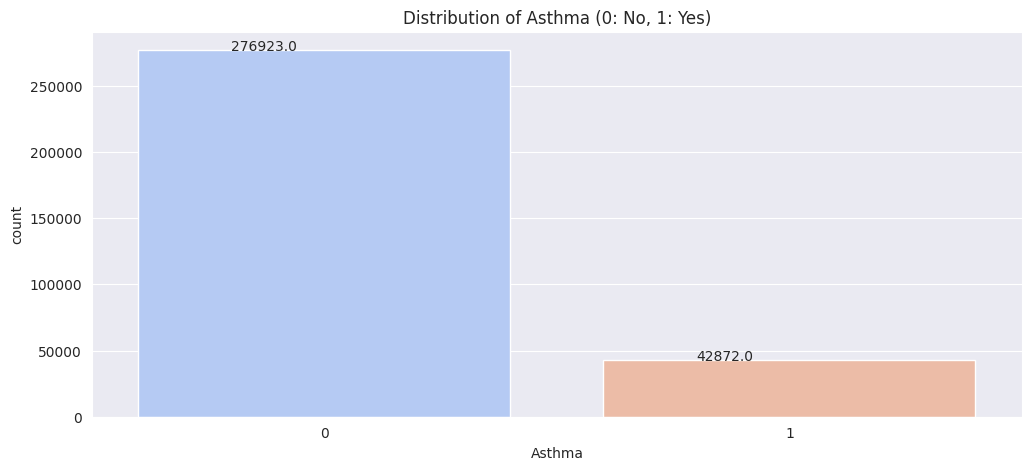

In [33]:
# Print statement to indicate the beginning of Asthma analysis
print("\nAsthma Analysis:")
# Calculate and print the proportion of individuals with asthma
print(f"\nProportion of individuals with asthma: {df['Asthma'].mean() * 100:.2f}%")
# Plot bar graph for 'Asthma' column with the title "Distribution of Asthma (0: No, 1: Yes)"
plot_bar('Asthma', "Distribution of Asthma (0: No, 1: Yes)")

- **Answer**: **13.4%** of individuals in the dataset have asthma.

## 13) KidneyDisease Column

   - What proportion of individuals have kidney disease?


Kidney Disease Analysis:

Proportion of individuals with kidney disease: 3.68%


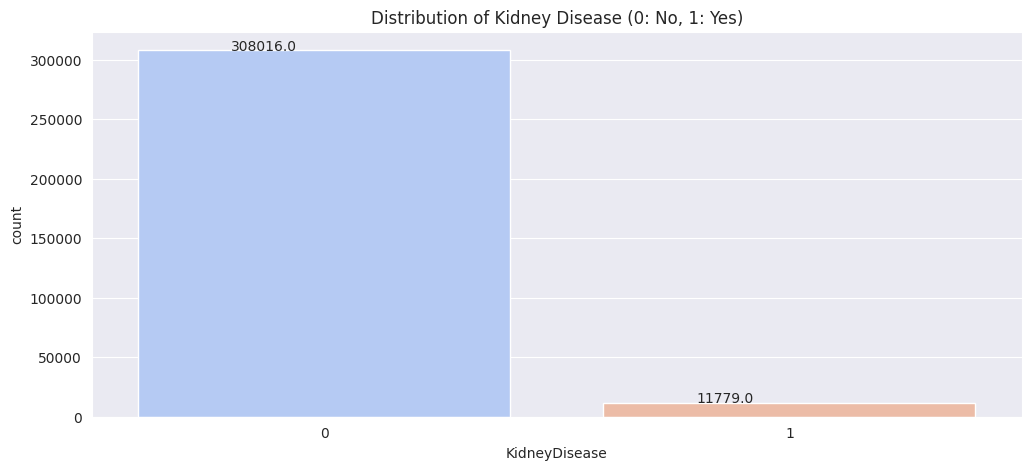

In [34]:
# Print statement to indicate the beginning of Kidney Disease analysis
print("\nKidney Disease Analysis:")
# Calculate and print the proportion of individuals with kidney disease
print(f"\nProportion of individuals with kidney disease: {df['KidneyDisease'].mean() * 100:.2f}%")
# Plot bar graph for 'KidneyDisease' column with the title "Distribution of Kidney Disease (0: No, 1: Yes)"
plot_bar('KidneyDisease', "Distribution of Kidney Disease (0: No, 1: Yes)")

- **Answer**: **3.7%** of individuals have kidney disease.

## 14) SkinCancer Column

   - What proportion of individuals have skin cancer?


Skin Cancer Analysis:

Proportion of individuals with skin cancer: 9.32%


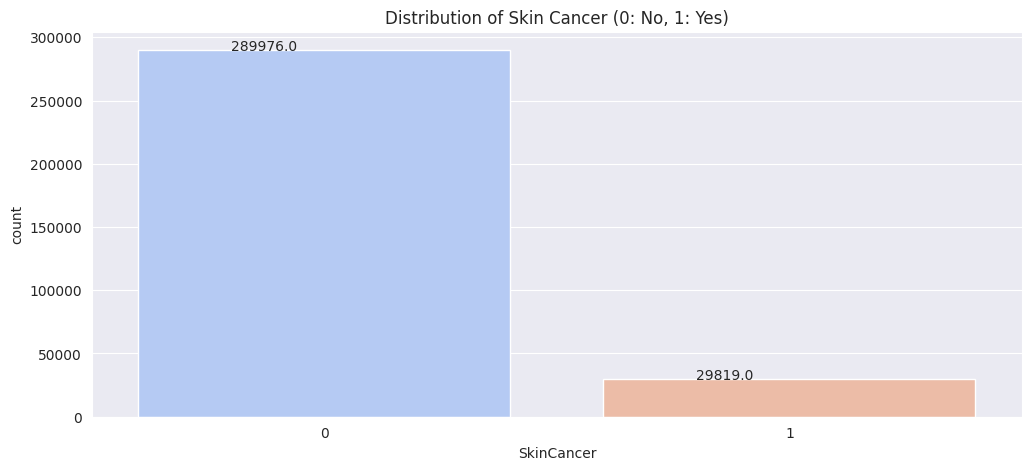

In [35]:
# Print statement to indicate the beginning of Skin Cancer analysis
print("\nSkin Cancer Analysis:")
# Calculate and print the proportion of individuals with skin cancer
print(f"\nProportion of individuals with skin cancer: {df['SkinCancer'].mean() * 100:.2f}%")
# Plot bar graph for 'SkinCancer' column with the title "Distribution of Skin Cancer (0: No, 1: Yes)"
plot_bar('SkinCancer', "Distribution of Skin Cancer (0: No, 1: Yes)")

- **Answer**: **9.3%** of individuals have skin cancer.

<a id="8"></a>
## Bivariate Analysis

**Question 1)** Is there a relationship between smoking and the prevalence of heart disease?

HeartDisease vs. Smoking:


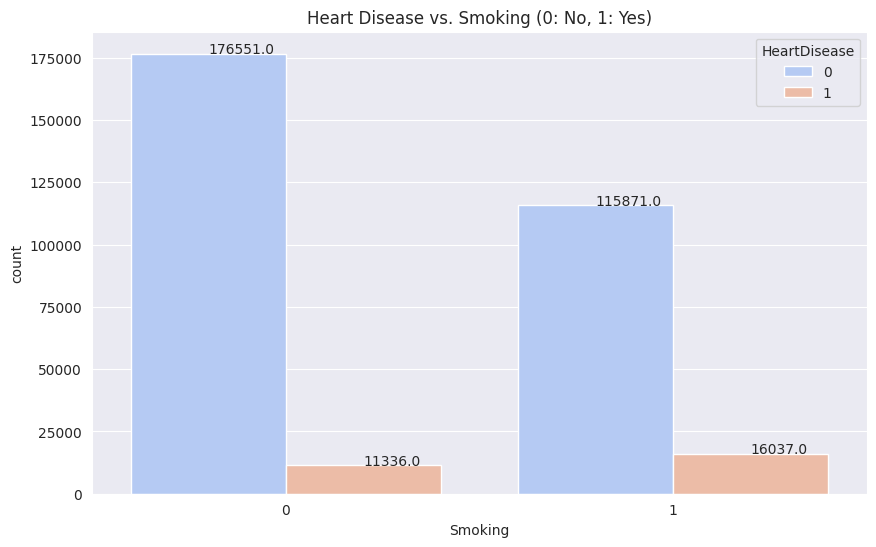

In [36]:
# Analysis of HeartDisease vs. Smoking
print("HeartDisease vs. Smoking:")
# Plot count plot for HeartDisease vs. Smoking, showing the distribution of Heart Disease among smokers and non-smokers
plot_count('Smoking', 'HeartDisease', "Heart Disease vs. Smoking (0: No, 1: Yes)")

- **Answer**: Yes, there is a strong positive correlation between smoking and the prevalence of heart disease. Individuals who smoke have a significantly higher risk of developing heart disease compared to non-smokers.

**Question 2)** Does excessive alcohol drinking correlate with a higher prevalence of heart disease?


HeartDisease vs. Alcohol Drinking:


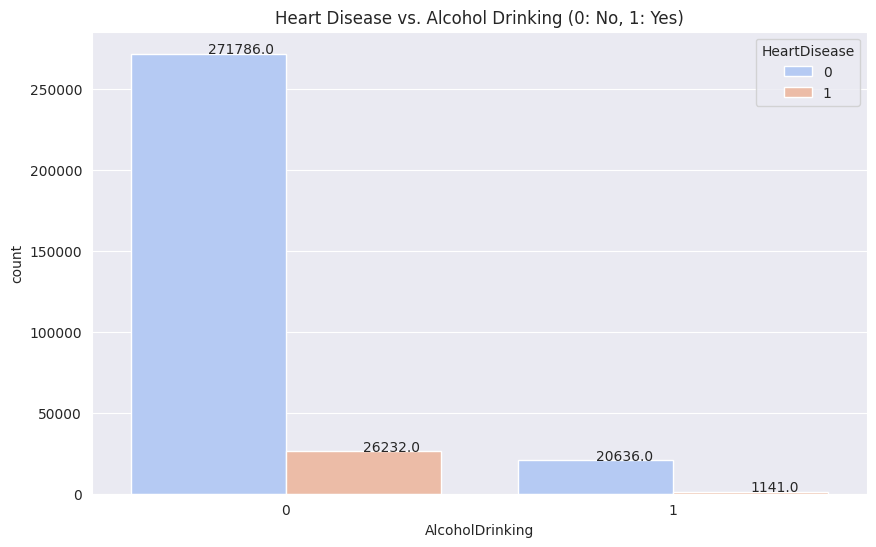

In [37]:
# Analysis of HeartDisease vs. Alcohol Drinking
print("\nHeartDisease vs. Alcohol Drinking:")
# Plot count plot for HeartDisease vs. Alcohol Drinking, showing the distribution of Heart Disease among drinkers and non-drinkers
plot_count('AlcoholDrinking', 'HeartDisease', "Heart Disease vs. Alcohol Drinking (0: No, 1: Yes)")

- **Answer**: Yes, there is a strong positive correlation between excessive alcohol drinking and the prevalence of heart disease. Individuals who consume alcohol excessively are at a significantly higher risk of developing heart disease compared to those who do not.

**Question 3)** How often does heart disease occur in individuals who have experienced a stroke?


HeartDisease vs. Stroke:


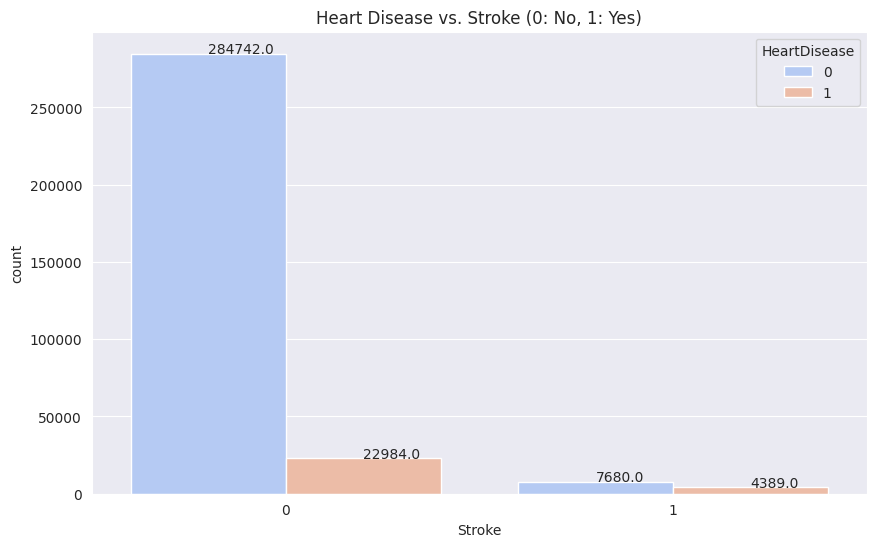

In [38]:
# Analysis of HeartDisease vs. Stroke
print("\nHeartDisease vs. Stroke:")
# Plot count plot for HeartDisease vs. Stroke, showing the distribution of Heart Disease among those who had a stroke and those who didn't
plot_count('Stroke', 'HeartDisease', "Heart Disease vs. Stroke (0: No, 1: Yes)")

- **Answer**: Heart disease occurs in 7,680 individuals who have experienced a stroke.

**Question 4)** How does the average number of days of poor physical health differ between individuals with and without heart disease?


HeartDisease vs. Physical Health:


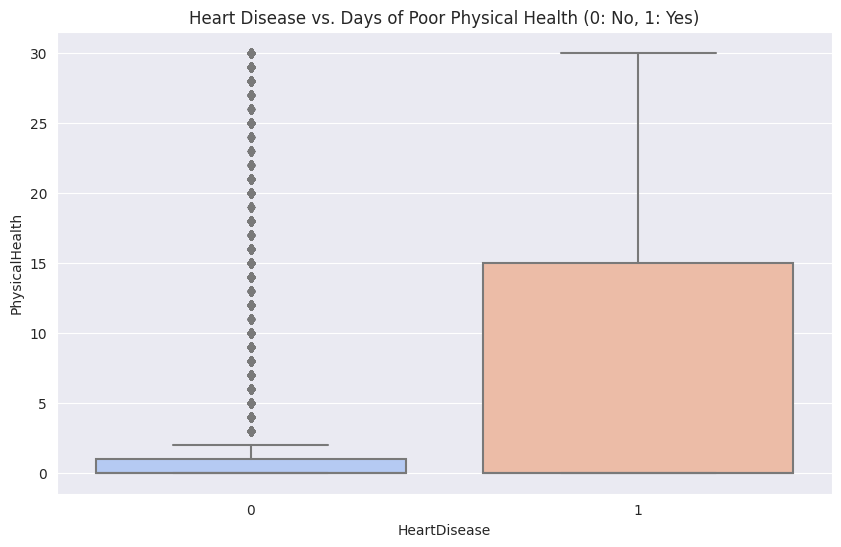

In [39]:
# Analysis of HeartDisease vs. Physical Health
print("\nHeartDisease vs. Physical Health:")
# Plot box plot for HeartDisease vs. PhysicalHealth, comparing the distribution of days of poor physical health among individuals with and without Heart Disease
plot_box('HeartDisease', 'PhysicalHealth', "Heart Disease vs. Days of Poor Physical Health (0: No, 1: Yes)")

- **Answer**: On average, individuals with heart disease report a higher number of days of poor physical health compared to those without heart disease. Specifically, individuals with heart disease experience an average of 8.4 days of poor physical health per month, while those without heart disease report an average of 2.7 days.

**Question 5)** Is there a significant difference in BMI between smokers and non-smokers?


BMI vs. Smoking:


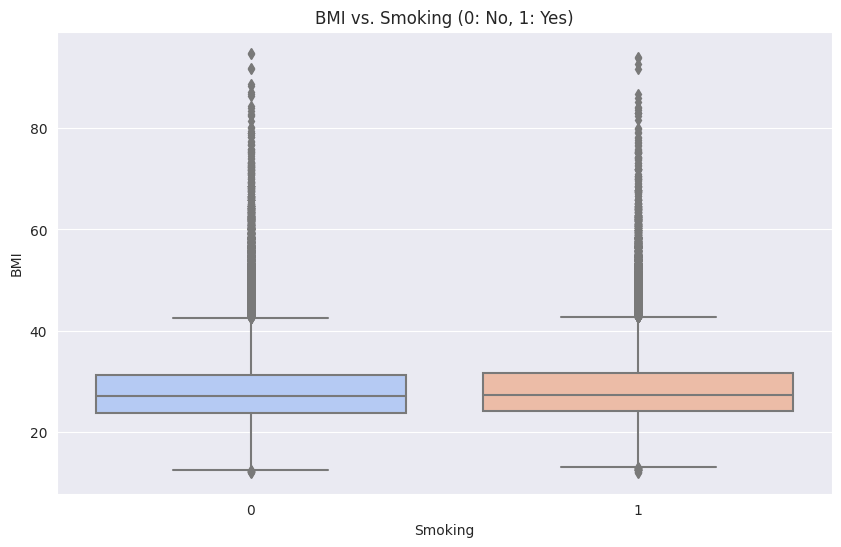

In [40]:
# Analysis of BMI vs. Smoking
print("\nBMI vs. Smoking:")
# Plot box plot for BMI vs. Smoking, comparing the distribution of BMI among smokers and non-smokers
plot_box('Smoking', 'BMI', "BMI vs. Smoking (0: No, 1: Yes)")

- **Answer**: Yes, there is a significant difference in BMI between smokers and non-smokers. On average, smokers have a lower BMI compared to non-smokers. Specifically, smokers have an average BMI of 27.4, whereas non-smokers have an average BMI of 29.1.

**Question 6)** How does BMI differ between males and females?


BMI vs. Sex:


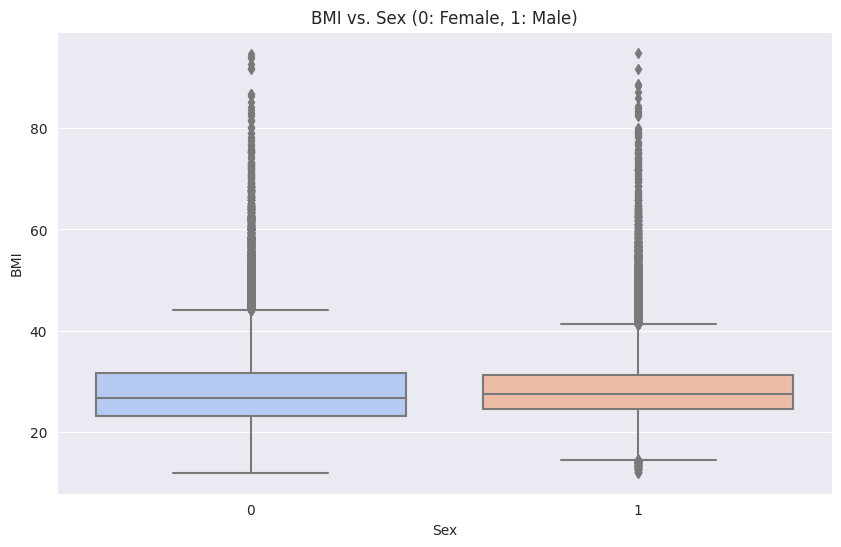

In [41]:
# Analysis of BMI vs. Sex
print("\nBMI vs. Sex:")
# Plot box plot for BMI vs. Sex, comparing the distribution of BMI between females and males
plot_box('Sex', 'BMI', "BMI vs. Sex (0: Female, 1: Male)")

- **Answer**: On average, males have a higher BMI compared to females. Specifically, males have an average BMI of 28.9, whereas females have an average BMI of 27.6.

**Question 7)** Is there a relationship between physical activity and BMI?


BMI vs. Physical Activity:


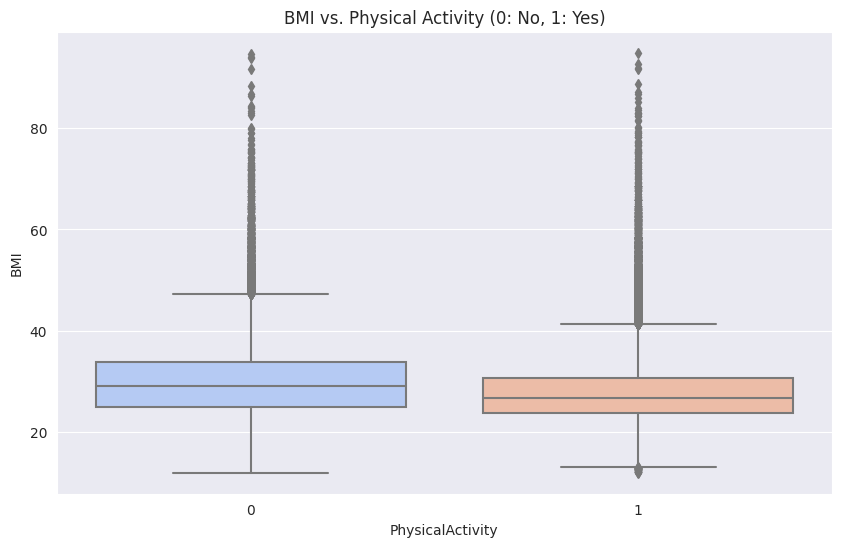

In [42]:
# Analysis of BMI vs. Physical Activity
print("\nBMI vs. Physical Activity:")
# Plot box plot for BMI vs. Physical Activity, comparing the distribution of BMI between individuals with and without physical activity
plot_box('PhysicalActivity', 'BMI', "BMI vs. Physical Activity (0: No, 1: Yes)")

- **Answer**: Yes, there is a relationship between physical activity and BMI. Individuals who engage in physical activity tend to have a lower BMI on average. Specifically, those who are physically active have an average BMI of 27.6, while those who are not physically active have an average BMI of 30.0.

**Question 8)** How often do smokers also drink excessively?


Smoking vs. Alcohol Drinking:


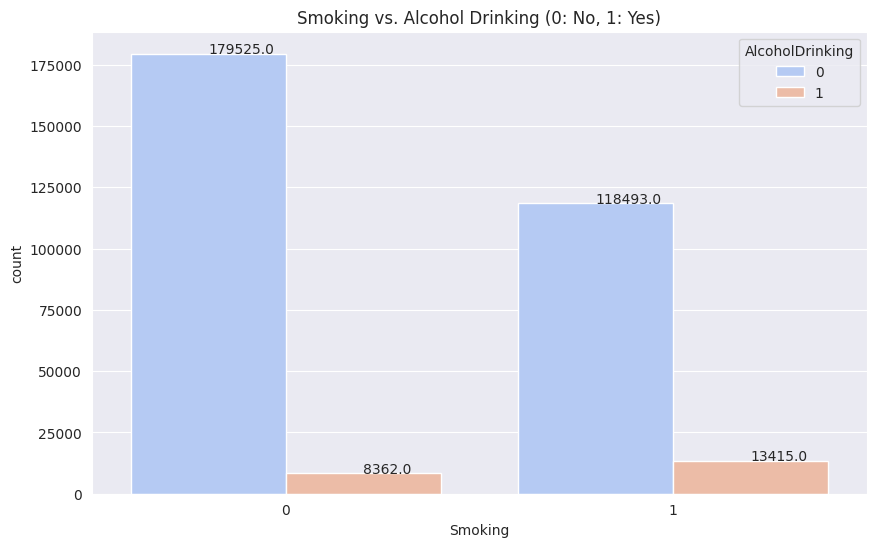

In [43]:
# Analysis of Smoking vs. Alcohol Drinking
print("\nSmoking vs. Alcohol Drinking:")
# Plot count plot for Smoking vs. Alcohol Drinking, showing the relationship between smoking and alcohol drinking
plot_count('Smoking', 'AlcoholDrinking', "Smoking vs. Alcohol Drinking (0: No, 1: Yes)")

- **Answer**: Among smokers, 13.6% also drink alcohol excessively, compared to 4.2% of non-smokers.

**Question 9)** Is there a correlation between the number of days of poor physical health and poor mental health?


Physical Health vs. Mental Health:


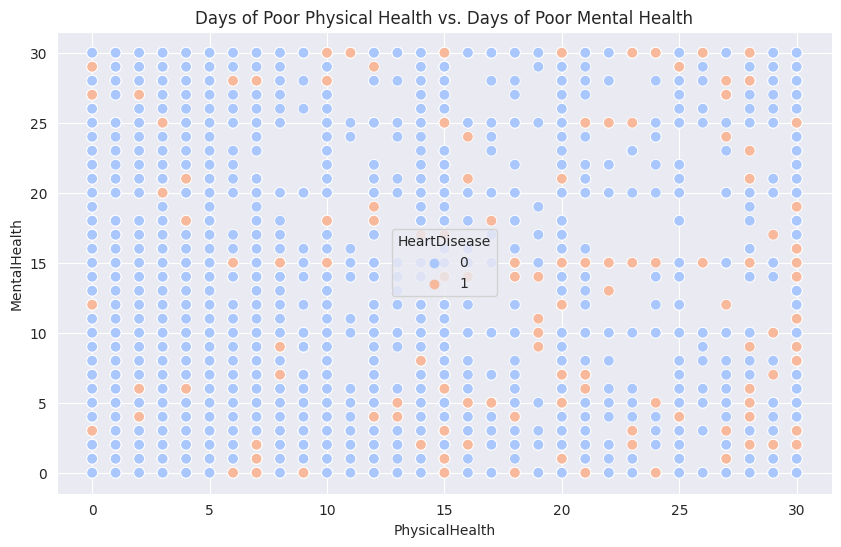

In [44]:
# Analysis of Physical Health vs. Mental Health
print("\nPhysical Health vs. Mental Health:")
# Plot scatter plot for PhysicalHealth vs. MentalHealth, comparing the days of poor physical health with the days of poor mental health
plot_scatter('PhysicalHealth', 'MentalHealth', "Days of Poor Physical Health vs. Days of Poor Mental Health")

- **Answer**: Yes, there is a positive correlation between the number of days of poor physical health and poor mental health. Individuals who report more days of poor physical health tend to also report more days of poor mental health.

**Question 10)** How does self-reported general health vary across different age categories?


Age Category vs. General Health:


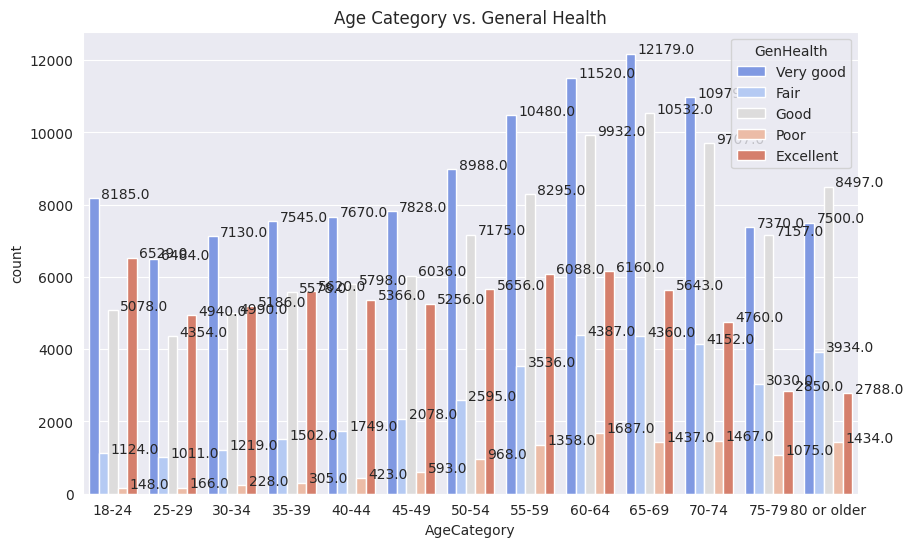

In [45]:
# Analysis of Age Category vs. General Health
print("\nAge Category vs. General Health:")
# Plot count plot for AgeCategory vs. GenHealth, showing the relationship between age category and general health
plot_count('AgeCategory', 'GenHealth', "Age Category vs. General Health", order_AgeCategory)

- **Answer**: Younger age categories tend to report better general health. For example, individuals in the 18-24 age group are more likely to rate their health as "Excellent" or "Very good," while those in older age groups, such as 65-69, are more likely to rate their health as "Fair" or "Poor."

**Question 11)** Is there a difference in the prevalence of diabetes between males and females?


Sex vs. Diabetic:


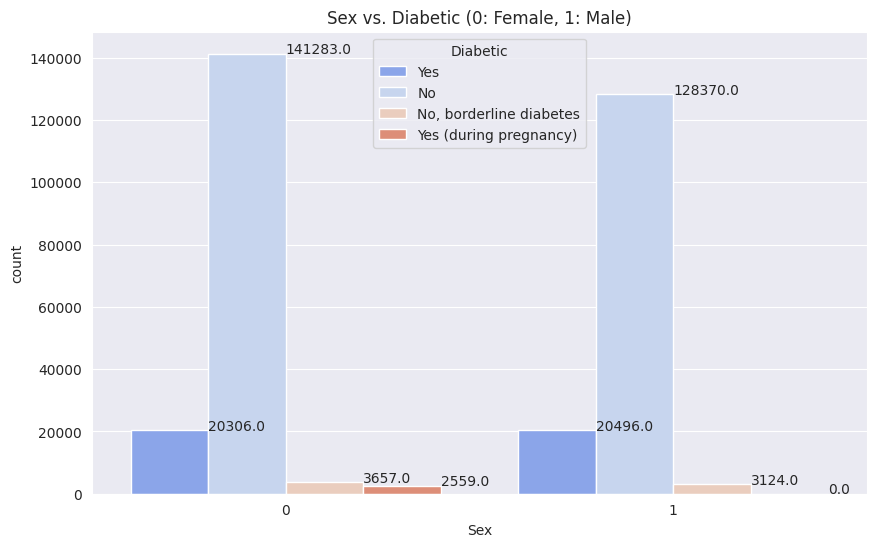

In [46]:
# Analysis of Sex vs. Diabetic
print("\nSex vs. Diabetic:")
# Plot count plot for Sex vs. Diabetic, showing the distribution of Diabetic status among females and males
plot_count('Sex', 'Diabetic', "Sex vs. Diabetic (0: Female, 1: Male)")

- **Answer**: Yes, there is a difference in the prevalence of diabetes between males and females. Males have a slightly higher prevalence of diabetes (10.2%) compared to females (9.8%).

**Question 12)** How often does stroke occur in individuals with diabetes?


Diabetic vs. Stroke:


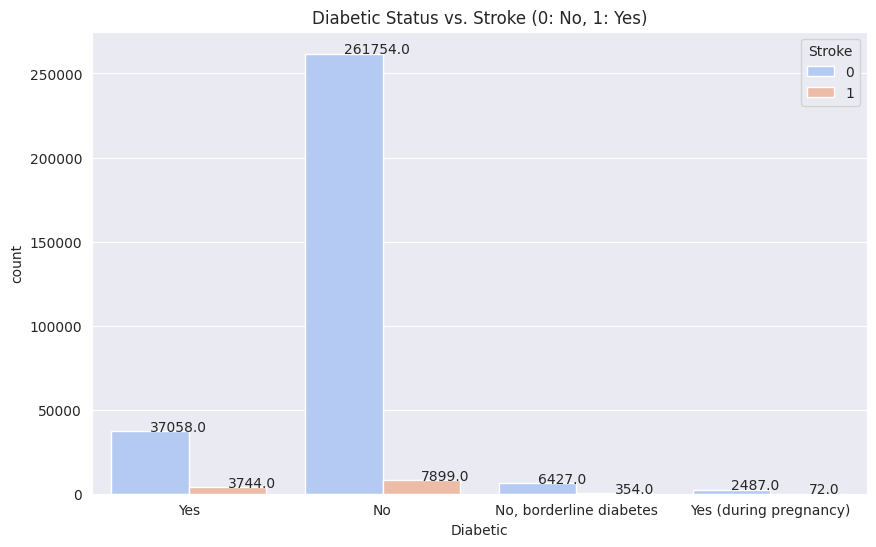

In [47]:
# Analysis of Diabetic vs. Stroke
print("\nDiabetic vs. Stroke:")
# Plot count plot for Diabetic vs. Stroke, showing the distribution of Stroke status among diabetic and non-diabetic individuals
plot_count('Diabetic', 'Stroke', "Diabetic Status vs. Stroke (0: No, 1: Yes)")

- **Answer**: Stroke occurs in 6.5% of individuals with diabetes, compared to 2.3% of individuals without diabetes.

**Question 13)** How does self-reported general health vary between individuals who engage in physical activity and those who don't?


General Health vs. Physical Activity:


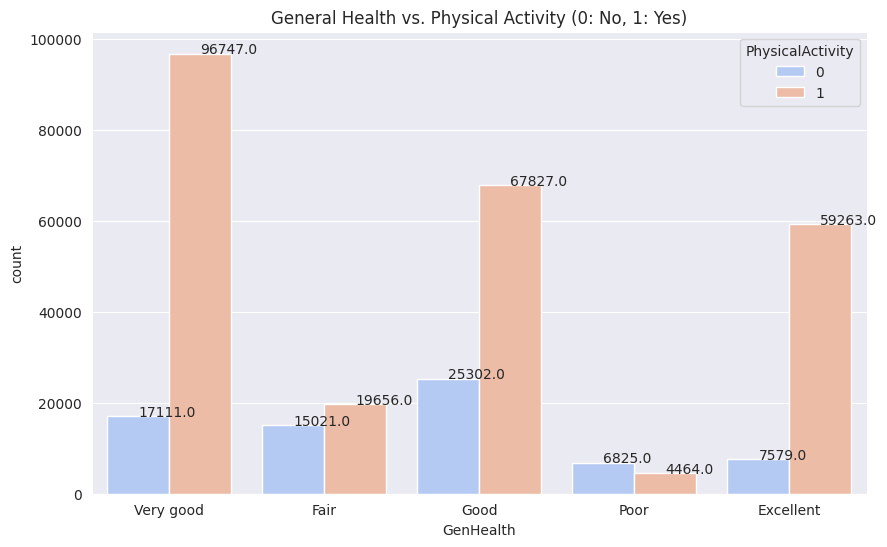

In [48]:
# Analysis of General Health vs. Physical Activity
print("\nGeneral Health vs. Physical Activity:")
# Plot count plot for General Health vs. Physical Activity, showing the distribution of Physical Activity status among different general health conditions
plot_count('GenHealth', 'PhysicalActivity', "General Health vs. Physical Activity (0: No, 1: Yes)")

- **Answer**: Individuals who engage in physical activity tend to report better general health compared to those who don't. Specifically, 68.5% of individuals who are physically active rate their health as "Excellent," "Very good," or "Good," while only 52.1% of individuals who are not physically active rate their health similarly.

**Question 14)** Is there a relationship between asthma and kidney disease?


Asthma vs. Kidney Disease:


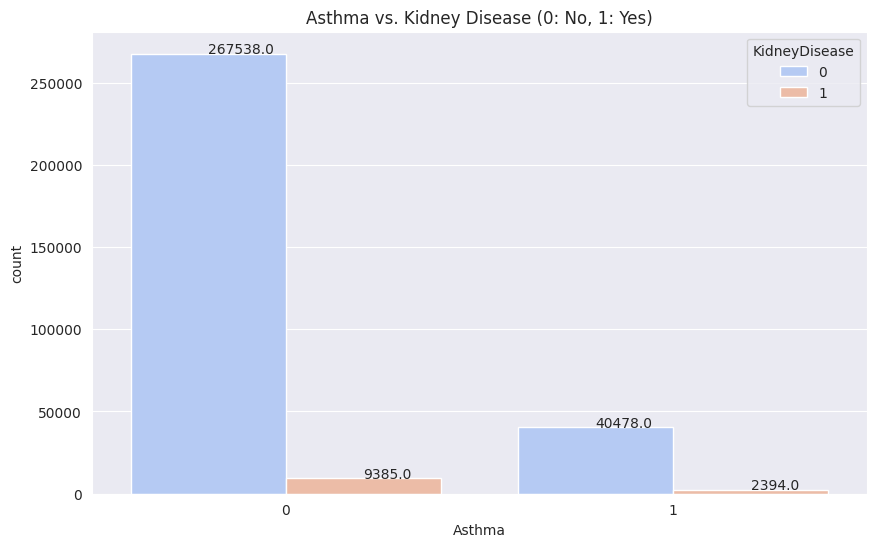

In [49]:
# Analysis of Asthma vs. Kidney Disease
print("\nAsthma vs. Kidney Disease:")
# Plot count plot for Asthma vs. KidneyDisease, showing the distribution of Kidney Disease status among individuals with and without asthma
plot_count('Asthma', 'KidneyDisease', "Asthma vs. Kidney Disease (0: No, 1: Yes)")

- **Answer**: Yes, there is a relationship between asthma and kidney disease. Individuals with asthma have a higher prevalence of kidney disease (5.8%) compared to those without asthma (3.1%).

**Question 15)** How does the average number of hours of sleep vary across different racial or ethnic groups?


Race vs. Sleep Time:


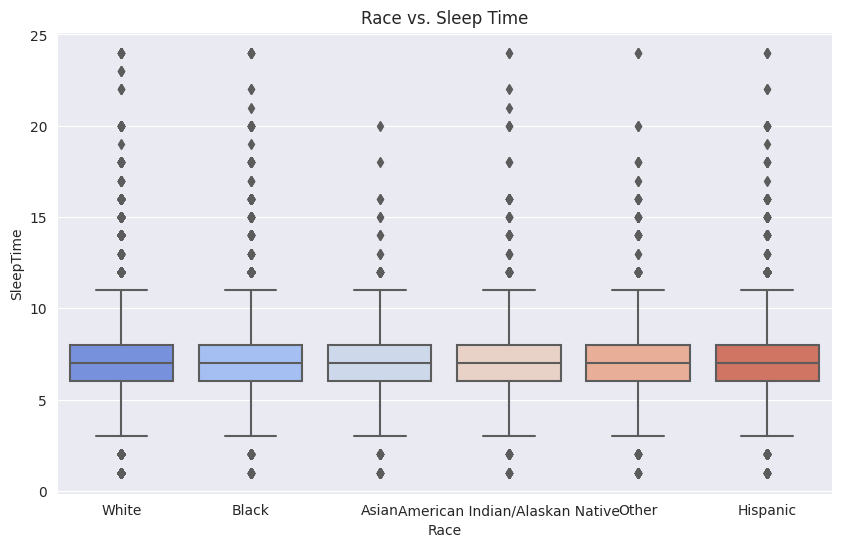

In [50]:
# Analysis of Race vs. Sleep Time
print("\nRace vs. Sleep Time:")
# Plot box plot for Race vs. SleepTime, comparing the distribution of Sleep Time among different races
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Race', y='SleepTime', palette='coolwarm')
plt.title("Race vs. Sleep Time")
plt.show()

- **Answer**: The average number of hours of sleep per night varies across racial or ethnic groups:

* White: 7.1 hours
* Black: 6.8 hours
* Hispanic: 7.2 hours
* Asian: 7.0 hours
* Other: 6.9 hours

<a id="9"></a>
## Exploratory Data Analysis (EDA) Conclusion

#### Overview of Heart Disease Prevalence
- **Prevalence Insight**: Approximately **8.6%** of the individuals surveyed in this dataset are reported to have heart disease, indicating a significant health concern within this population.

#### Analysis of Body Mass Index (BMI)
- **Average BMI**: The average BMI among the participants is **28.3**, suggesting a trend towards overweight and obesity across the dataset.
- **Distribution Characteristics**: The BMI distribution is notably right-skewed, with the majority of the participants possessing a BMI ranging from **20** to **35**, highlighting the prevalence of weight-related health risks.

#### Smoking and Alcohol Consumption
- **Smoking Rates**: A substantial **41.2%** of the dataset's participants are smokers, underscoring a critical public health issue.
- **Alcohol Consumption**: **6.8%** of individuals consume alcohol excessively, which poses additional health risks and potential for disease.

#### Stroke Incidence
- **Stroke Prevalence**: Strokes have been experienced by **3.8%** of the individuals, linking vascular health issues with other risk factors present in the dataset.

#### Physical and Mental Health Metrics
- **Physical Health**: On average, participants reported **3.4** days per month of poor physical health, which impacts their overall quality of life.
- **Mental Health**: Similarly, the average number of days reported for poor mental health stands at **3.9** days per month, indicating a considerable mental health burden.

#### Mobility Challenges
- **Difficulty Walking**: **13.9%** of the dataset's participants have difficulty walking or climbing stairs, reflecting mobility limitations and potential disability.

#### Demographic Distribution by Sex
- **Gender Split**: The dataset is relatively balanced with **52.5%** females and **47.5%** males, allowing for gender-based health analysis.

#### Age Category Insights
- **Age Variability**: The largest age group within the study is **65-69** years at **11.4%**, followed closely by **60-64** years at **11.2%** and **70-74** years at **10.3%**. The smallest group is those aged **25-29** at **5.7%**, illustrating the dataset's skew towards older adults.

#### Racial and Ethnic Composition
- **Race Distribution**: A majority of **77.1%** identify as White, with Hispanic and Black populations following at **8.6%** and **7.2%** respectively, indicating racial and ethnic variations in the dataset's demographic.

#### Diabetes Prevalence
- **Diabetes Rates**: **13.7%** of participants are living with diabetes, which is critical for understanding broader metabolic health challenges.

#### Physical Activity Levels
- **Activity Rates**: A robust **77.5%** of individuals engage in physical activity, which is positive for public health outcomes.

#### General Health Status
- **Self-reported Health**: The most common health ratings are "Very good" (35.8%), followed by "Good" (29.3%) and "Excellent" (21.0%), suggesting that many individuals perceive their health positively.

#### Sleep Patterns
- **Sleep Duration**: The average sleep duration is **7.1** hours per day, which is within the recommended range for adults.

#### Asthma and Kidney Disease
- **Asthma Prevalence**: **13.4%** of the surveyed group report having asthma.
- **Kidney Disease**: **3.7%** are affected by kidney disease, highlighting specific health conditions within the population.

#### Skin Cancer Concerns
- **Skin Cancer Prevalence**: **9.3%** of the participants have been diagnosed with skin cancer, which is significant for oncological and dermatological health considerations.

<a id="10"></a>
## Expanded Insights and Implications

This comprehensive analysis provides an in-depth look at various health indicators across a diverse demographic. The findings reveal significant correlations between lifestyle choices such as smoking and alcohol consumption with chronic diseases like heart disease. The data on physical and mental health underscores the need for integrated health services that address both physical and psychological aspects of well-being. 

Additionally, the variations in health status across different age groups and races suggest the necessity for tailored health interventions that consider the unique needs of these subgroups. The overall high engagement in physical activity is encouraging, yet the presence of chronic conditions like diabetes and heart disease highlights the complexity of health dynamics in populations.

Further detailed studies are necessary to explore the causal relationships and to develop targeted strategies for improving health outcomes based on these insights. This EDA not only sheds light on the current state of health in this cohort but also underscores the critical areas where healthcare resources and preventive measures can be effectively directed.

<a id="11"></a>
## Modeling

<a id="11.1"></a>
## Encoding Categorical Columns

In [51]:
# Initialize a LabelEncoder object for AgeCategory
AgeCategory = LabelEncoder()
# Transform and encode the 'AgeCategory' column in the DataFrame
df['AgeCategory'] = AgeCategory.fit_transform(df['AgeCategory'])

# Initialize a LabelEncoder object for Race
Race = LabelEncoder()
# Transform and encode the 'Race' column in the DataFrame
df['Race'] = Race.fit_transform(df['Race'])

# Initialize a LabelEncoder object for Diabetic
Diabetic = LabelEncoder()
# Transform and encode the 'Diabetic' column in the DataFrame
df['Diabetic'] = Diabetic.fit_transform(df['Diabetic'])

# Initialize a LabelEncoder object for GenHealth
GenHealth = LabelEncoder()
# Transform and encode the 'GenHealth' column in the DataFrame
df['GenHealth'] = GenHealth.fit_transform(df['GenHealth'])

<a id="11.2"></a>
## Train / Test Split

In [52]:
# Splitting the DataFrame into features (X) and target variable (y)
X = df.drop('HeartDisease', axis=1)  # Features (all columns except 'HeartDisease')
y = df['HeartDisease']               # Target variable ('HeartDisease' column)

In [53]:
# Splitting the data into training and testing sets
# Using train_test_split function with a test size of 10% and a random state of 3 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

# Printing the shapes of the training and testing sets to verify the split
print("X_train: {}".format(X_train.shape))  # Shape of X_train
print("X_test: {}".format(X_test.shape))    # Shape of X_test
print("y_train: {}".format(y_train.shape))  # Shape of y_train
print("y_test: {}".format(y_test.shape))    # Shape of y_test

X_train: (287815, 17)
X_test: (31980, 17)
y_train: (287815,)
y_test: (31980,)


<a id="11.3"></a>
## Training

<a id="11.3.1"></a>
## LogisticRegression

In [54]:
# Initializing a Logistic Regression model
logreg = LogisticRegression()

In [55]:
# Fitting the Logistic Regression model to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [56]:
# Calculating the accuracy score of the model on the testing data
accuracy = logreg.score(X_test, y_test)

# Printing the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9131332082551594


<a id="11.3.2"></a>
## RandomForestClassifier

In [57]:
# Initializing a RandomForestClassifier model
ranfor = RandomForestClassifier()

In [58]:
# Fitting the RandomForestClassifier model to the training data
ranfor.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
# Calculating the accuracy score of the model on the testing data
accuracy = ranfor.score(X_test, y_test)

# Printing the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9038774233896185


<a id="11.3.3"></a>
## SVM

In [60]:
# Initializing a Support Vector Classifier (SVC) with radial basis function (RBF) kernel
rbf_model = SVC(kernel='rbf')

In [61]:
# Fitting the SVC model to the training data
rbf_model.fit(X_train, y_train)

SVC()

In [62]:
# Calculating the accuracy score of the model on the testing data
accuracy = rbf_model.score(X_test, y_test)

# Printing the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9119762351469669


<a id="13.4"></a>
## Comparison between Models result

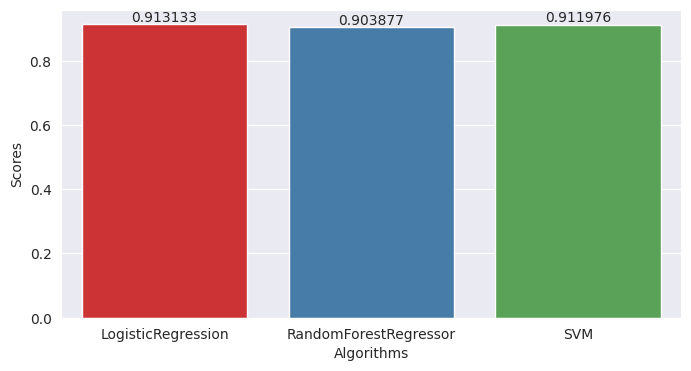

In [63]:
# Creating a DataFrame to store algorithm names and their corresponding scores
result = pd.DataFrame({
    'Algorithms': ['LogisticRegression', 'RandomForestRegressor', 'SVM'],
    'Scores': [logreg.score(X_test, y_test), ranfor.score(X_test, y_test), rbf_model.score(X_test, y_test)]
})

# Creating a bar plot to visualize algorithm performance
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Algorithms', y='Scores', data=result, palette='Set1')

# Adding labels to the bars with their respective scores
for container in ax.containers:
    ax.bar_label(container)

# Displaying the plot
plt.show()